### Q.1. Write python code from scratch for simple Linear Regression problem, the following training data are given.
     X = [2,  2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
     Y = [5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8]
### The model Y as a linear function of X 
### 1. Use batch gradient descent learning algorithm to learn model parameters for α = 0.01 choose random values of weights and bias and epochs=1000.  Use MSE as loss function with an appropriate convergence criterion. 
### 2. Plot cost function (J) for the learning duration 
### 3. plot the regression line  
### 4. repeat 2. to 3. for stochastic gradient descent  and Adam optimization algorithm 
### 5. Plot comparative loss curve 


In [10]:
# Part One 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# from activations import ReLU
from losses import MSE 

plt.style.use("ggplot")
%matplotlib inline

In [2]:
inputs = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]) 
X = np.append(np.ones((inputs.shape[0], 1)), np.expand_dims(inputs, -1), axis=1) 
Y = np.array([5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8])
Y = np.expand_dims(Y, -1)

In [3]:
X.shape

(9, 2)

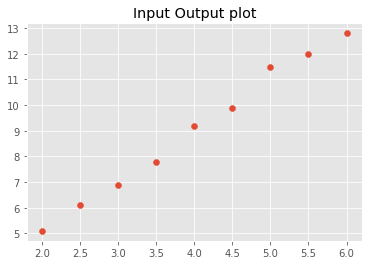

In [4]:
plt.scatter(inputs, Y)
plt.title("Input Output plot")
plt.show()

In [5]:
#Part One. Batch Size = 2

In [30]:
print(batches)

([array([[1., 4.],
       [1., 3.]]), array([[1. , 2.5],
       [1. , 5.5]])], [array([[9.2],
       [6.9]]), array([[ 6.1],
       [12. ]])])


In [29]:
batches = batch(X, Y, 2)

[[1.  4. ]
 [1.  3. ]
 [1.  2.5]
 [1.  5.5]
 [1.  2. ]
 [1.  5. ]
 [1.  6. ]
 [1.  3.5]
 [1.  4.5]]
[[ 9.2]
 [ 6.9]
 [ 6.1]
 [12. ]
 [ 5.1]
 [11.5]
 [12.8]
 [ 7.8]
 [ 9.9]]


In [20]:
batches[0]

[array([[1., 4.],
        [1., 2.]]),
 array([[1., 6.],
        [1., 5.]])]

In [12]:
lr = 0.01
epochs = 1000 
batch_size = 2

W = np.random.randn(2, 1)

In [28]:
def batch(X, Y, batch_size): 
    shuffled = np.random.permutation(len(X))
    X = X[shuffled]
    Y = Y[shuffled]

    print(X)
    print(Y)

    X_batch = [] 
    Y_batch = [] 
    i = 0
    while i <= batch_size: 
        X_batch.append(X[i : min((i + batch_size), len(X))])
        Y_batch.append(Y[i : min((i + batch_size), len(Y))])
        i += batch_size  
    return X_batch, Y_batch

In [14]:
def gradient_descent(W, X, Y, lr, batch_size):  
    # n = len(X) 
    batches = batch(X, Y, batch_size) 
    for xb, yb in batches:
        y_hat = xb.dot(W) 
        loss = MSE(yb, y_hat) 
        W += lr * loss/batch_size 
    return W, loss 

In [15]:
t = np.append(np.ones((9, 1)), np.zeros((9, 1)), axis = 1)
t[:2] 

array([[1., 0.],
       [1., 0.]])

In [17]:
w_hist = [] 
loss_hist = [] 
for epoch in range(epochs): 
    
    W, loss = gradient_descent(W, X, Y, lr, batch_size) 
    w_hist.append(W.copy())
    loss_hist.append(loss)
    print("Loss at epoch {}: {}".format(epoch, loss))

ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

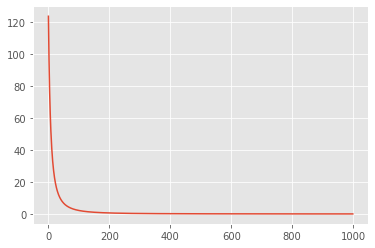

In [8]:
plt.plot(loss_hist)

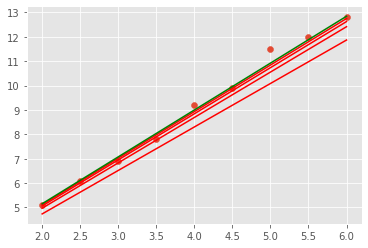

In [9]:
plt.scatter(inputs, Y) 
for i, w in enumerate(w_hist[:-1]):
    if(i%200 == 199):
        plt.plot(inputs, w[0] + inputs*w[1], color = "red")
plt.plot(inputs, w_hist[-1][0] + inputs*w_hist[-1][1], color = "green")
plt.show()